In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

covid_df=pd.read_csv("covid_19_india.csv")
covid_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15086 entries, 0 to 15085
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       15086 non-null  int64 
 1   Date                      15086 non-null  object
 2   Time                      15086 non-null  object
 3   State/UnionTerritory      15086 non-null  object
 4   ConfirmedIndianNational   15086 non-null  object
 5   ConfirmedForeignNational  15086 non-null  object
 6   Cured                     15086 non-null  int64 
 7   Deaths                    15086 non-null  int64 
 8   Confirmed                 15086 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.0+ MB


In [ ]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


In [ ]:
vaccine_df = pd.read_csv("covid_vaccine_statewise.csv")

vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [25]:

vaccine_df.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [37]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [39]:
covid_df['Date']=pd.to_datetime(covid_df['Date'],format='%Y-%m-%d')


In [40]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15086 entries, 0 to 15085
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  15086 non-null  datetime64[ns]
 1   State/UnionTerritory  15086 non-null  object        
 2   Cured                 15086 non-null  int64         
 3   Deaths                15086 non-null  int64         
 4   Confirmed             15086 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 589.4+ KB


In [43]:
#Active cases
covid_df['Active_Cases']=covid_df['Confirmed']-(covid_df['Cured']+covid_df['Deaths'])
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15086 entries, 0 to 15085
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  15086 non-null  datetime64[ns]
 1   State/UnionTerritory  15086 non-null  object        
 2   Cured                 15086 non-null  int64         
 3   Deaths                15086 non-null  int64         
 4   Confirmed             15086 non-null  int64         
 5   Active_Cases          15086 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 707.3+ KB


In [48]:
statewise = pd.pivot_table(covid_df, values=["Confirmed","Deaths","Cured"], 
                           index="State/UnionTerritory", aggfunc=max)
print(statewise)

                                          Confirmed    Cured  Deaths
State/UnionTerritory                                                
Andaman and Nicobar Islands                    6674     6359      92
Andhra Pradesh                              1475372  1254291    9580
Arunachal Pradesh                             22462    19977      88
Assam                                        340858   290774    2344
Bihar                                        664115   595377    4039
Cases being reassigned to states               9265        0       0
Chandigarh                                    56513    48831     647
Chhattisgarh                                 925531   823113   12036
Dadra and Nagar Haveli and Daman and Diu       9652     8944       4
Daman & Diu                                       2        0       0
Delhi                                       1402873  1329899   22111
Goa                                          138776   112633    2197
Gujarat                           

In [61]:
statewise["Recovery_Rate"] = statewise['Cured']*100/ statewise['Confirmed']
statewise["Mortality_Rate"] = statewise['Deaths']*100/ statewise['Confirmed']
statewise=statewise.sort_values(by="Confirmed", ascending=False)
statewise.head()

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate,Recovery_Rate,Mortality_Rate
State/UnionTerritory,,,,,,,
Maharashtra,5433506,4927480,83777,90.686934,1.541859,90.686934,1.541859
Karnataka,2272374,1674487,22838,73.688882,1.005028,73.688882,1.005028
Kerala,2200706,1846105,6612,83.886944,0.300449,83.886944,0.300449
Tamil Nadu,1664350,1403052,18369,84.300297,1.103674,84.300297,1.103674
Uttar Pradesh,1637663,1483249,18072,90.571076,1.103524,90.571076,1.103524


In [64]:
statewise.style.background_gradient(cmap="cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate,Recovery_Rate,Mortality_Rate
State/UnionTerritory,,,,,,,
Maharashtra,5433506,4927480,83777,90.686934,1.541859,90.686934,1.541859
Karnataka,2272374,1674487,22838,73.688882,1.005028,73.688882,1.005028
Kerala,2200706,1846105,6612,83.886944,0.300449,83.886944,0.300449
Tamil Nadu,1664350,1403052,18369,84.300297,1.103674,84.300297,1.103674
Uttar Pradesh,1637663,1483249,18072,90.571076,1.103524,90.571076,1.103524
Andhra Pradesh,1475372,1254291,9580,85.015237,0.649328,85.015237,0.649328
Delhi,1402873,1329899,22111,94.798246,1.576123,94.798246,1.576123
West Bengal,1171861,1026492,13576,87.595030,1.158499,87.595030,1.158499
Chhattisgarh,925531,823113,12036,88.934136,1.300443,88.934136,1.300443


In [72]:
topactive = (
    covid_df.groupby(by="State/UnionTerritory")
    .max()[['Active_Cases', 'Date']]
    .sort_values(by=['Active_Cases'], ascending=False)
    .reset_index()
)
topactive.head()


,State/UnionTerritory,Active_Cases,Date
0,Maharashtra,701614,2021-05-19
1,Karnataka,605515,2021-05-19
2,Kerala,445692,2021-05-19
3,Uttar Pradesh,310783,2021-05-19
4,Tamil Nadu,242929,2021-05-19


In [73]:
fig=plt.figure(figsize=(16,9))

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Top 10 states with most active cases in india')

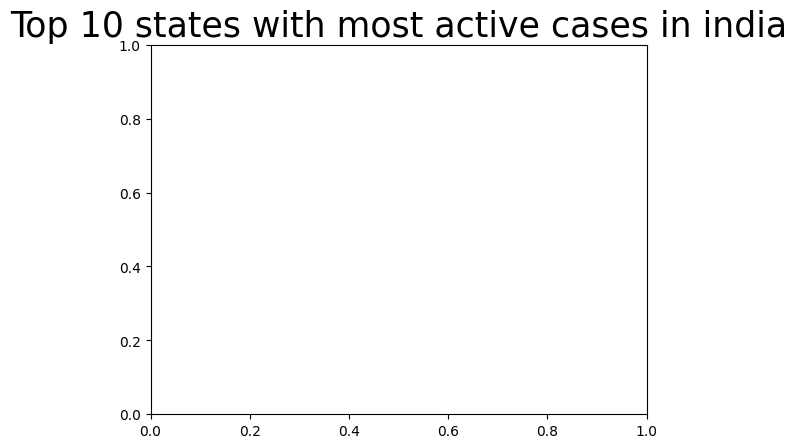

In [74]:
plt.title("Top 10 states with most active cases in india",size=25)

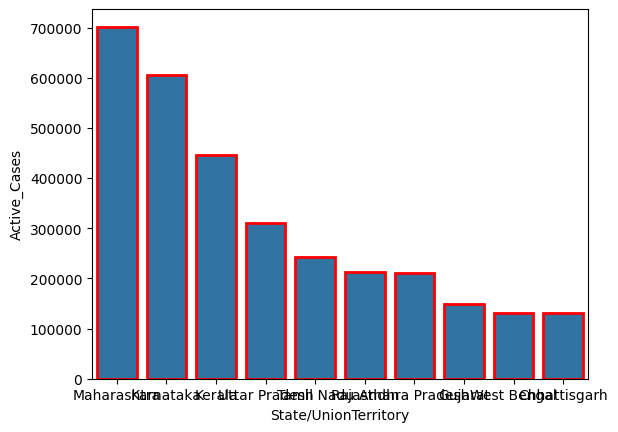

In [79]:
ax = sns.barplot(data=topactive.iloc[:10],y="Active_Cases", x="State/UnionTerritory",
                 linewidth=2,edgecolor="red")

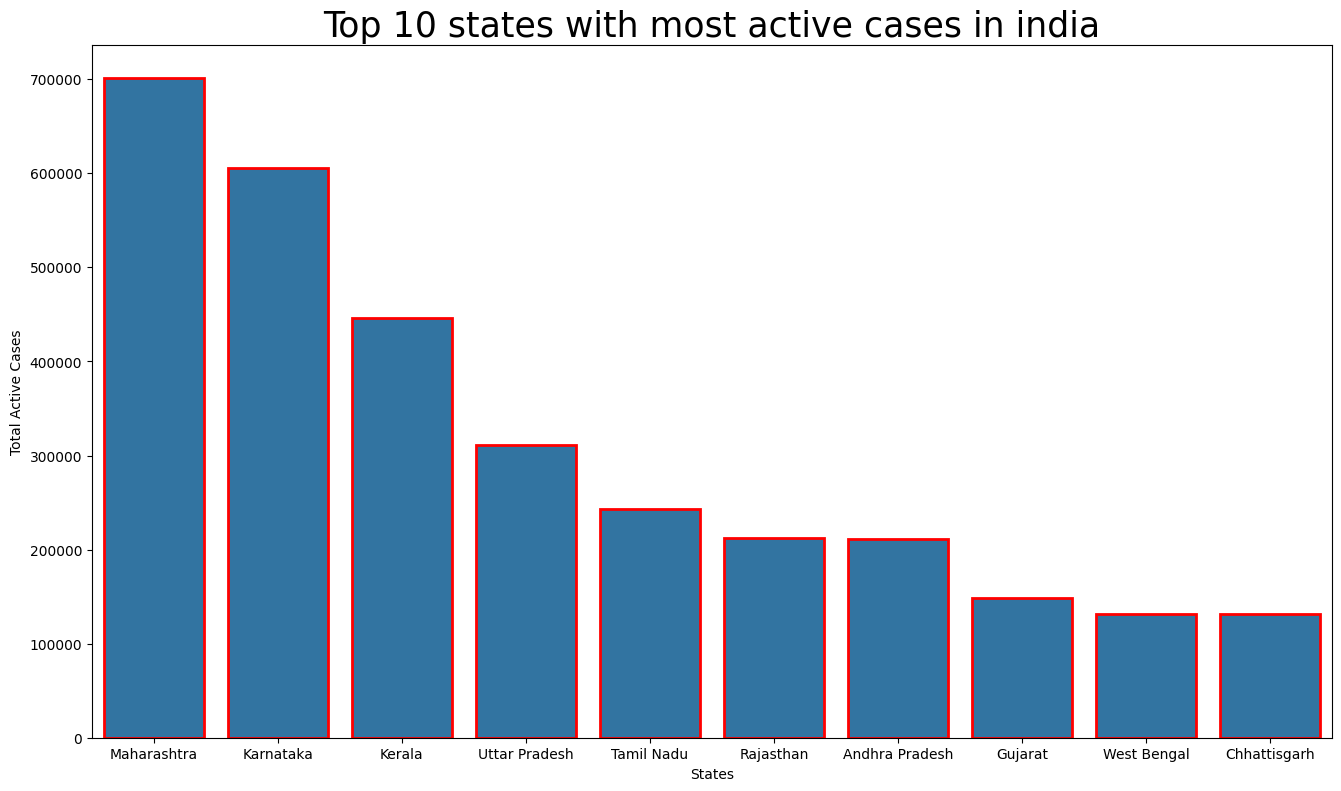

In [80]:
topactive = (
    covid_df.groupby(by="State/UnionTerritory")
    .max()[['Active_Cases', 'Date']]
    .sort_values(by=['Active_Cases'], ascending=False)
    .reset_index()
)
fig=plt.figure(figsize=(16,9))
plt.title("Top 10 states with most active cases in india",size=25)
ax = sns.barplot(data=topactive.iloc[:10],y="Active_Cases", x="State/UnionTerritory",
                 linewidth=2,edgecolor="red")
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

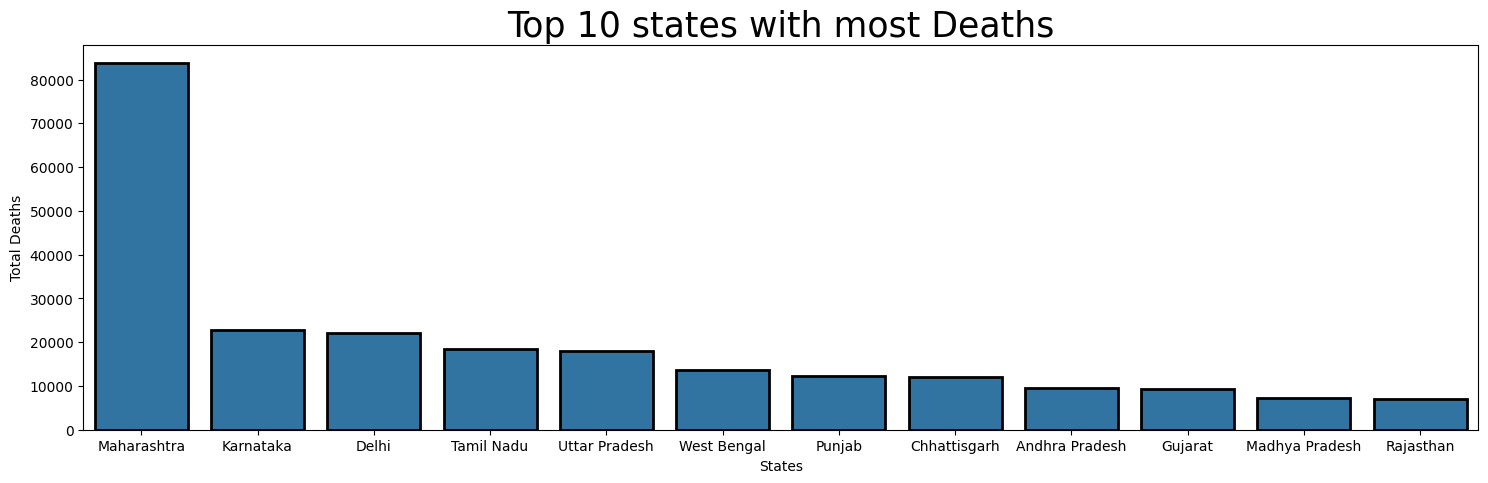

In [82]:
#Top States with highest Deaths
topDeaths=( 
  covid_df.groupby(by='State/UnionTerritory')
  .max()[['Deaths', 'Date']]
  .sort_values(by=['Deaths'], ascending=False)
    .reset_index()
)

fig=plt.figure(figsize=(18,5))
plt.title("Top 10 states with most Deaths",size=25)
ax = sns.barplot(data=topDeaths.iloc[:12],y="Deaths", x="State/UnionTerritory",
                 linewidth=2,edgecolor="black")
plt.xlabel("States")
plt.ylabel("Total Deaths")
plt.show()

Text(0.5, 1.0, 'Top 5 Affected States in India')

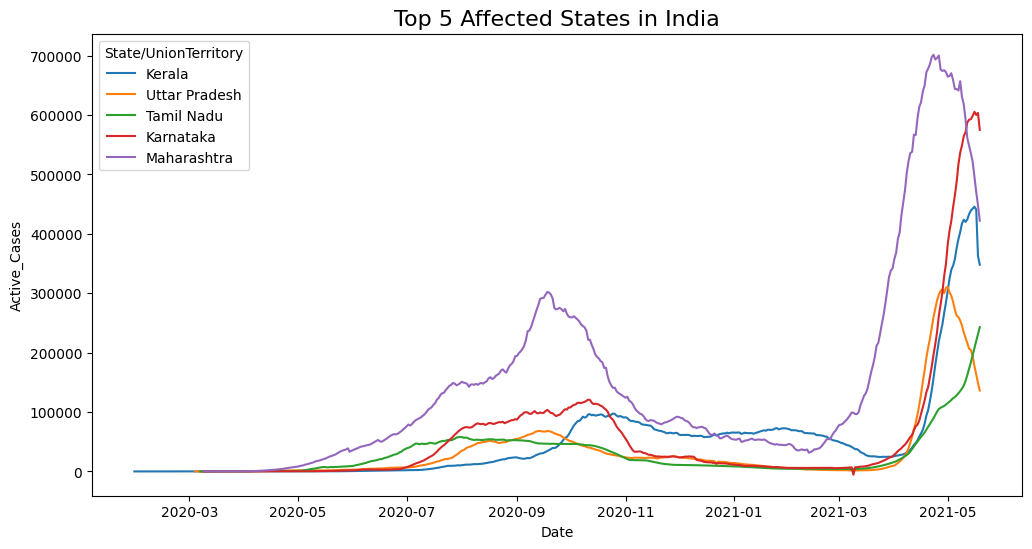

In [83]:
#Growth Trend
fig = plt.figure(figsize=(12,6))

ax = sns.lineplot(
    data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Uttar Pradesh'])], 
    x='Date', 
    y='Active_Cases', 
    hue="State/UnionTerritory"
)
ax.set_title("Top 5 Affected States in India",size=16)

In [84]:
vaccine_df.rename(columns={'Updated On' : 'Vaccine_Date'},inplace=True)

In [85]:
vaccine_df.head(10)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [89]:
vaccination = vaccine_df.drop(
    columns=['Sputnik V (Doses Administered)', 'AEFI', 
             '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', 
             '60+ Years (Doses Administered)'],
    axis=1
)

In [90]:
vaccine_df.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [92]:
#Male vs Female vaccination
male=vaccination["Male(Individuals Vaccinated)"].sum()
female=vaccination["Female(Individuals Vaccinated)"].sum()
px.pie(names=["Male","Female"],values=[male,female],title="Male and Female Vaccination")